In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import nltk
#nltk.download('stopwords')
from nltk.stem.porter import *
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import word2vec

from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_similarity_score
cv = CountVectorizer()
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
stop = set(stopwords.words("english"))
 
import warnings
warnings.filterwarnings('ignore')
import os
os.listdir("D:\CS525_IR\Group Project")   #change to the directory of your data
data = pd.read_csv('D:\CS525_IR\Group Project\data.csv',encoding = "ISO-8859-1")   #change to the directory of your data
data.head()

D:\Anaconda\envs\py36\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [2]:
data.shape
data.dtypes
data.isnull().sum()

data = data.dropna(subset=['reviews.text'])

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

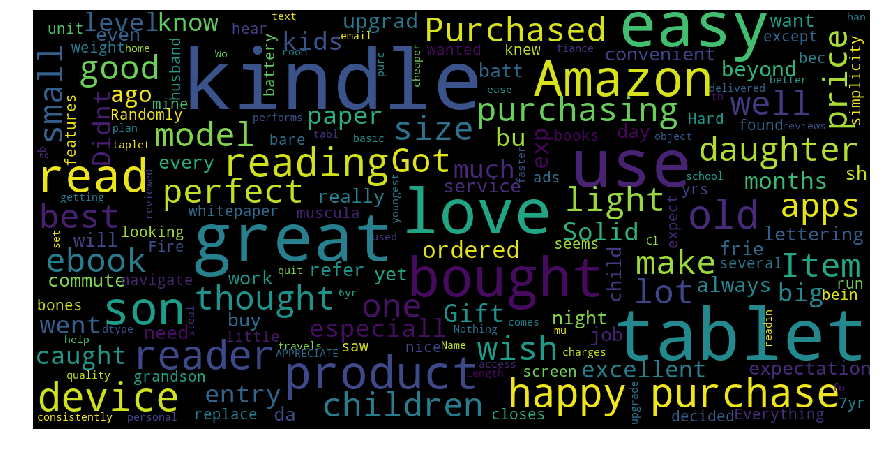

In [3]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['reviews.text'])
cnt_srs = data['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

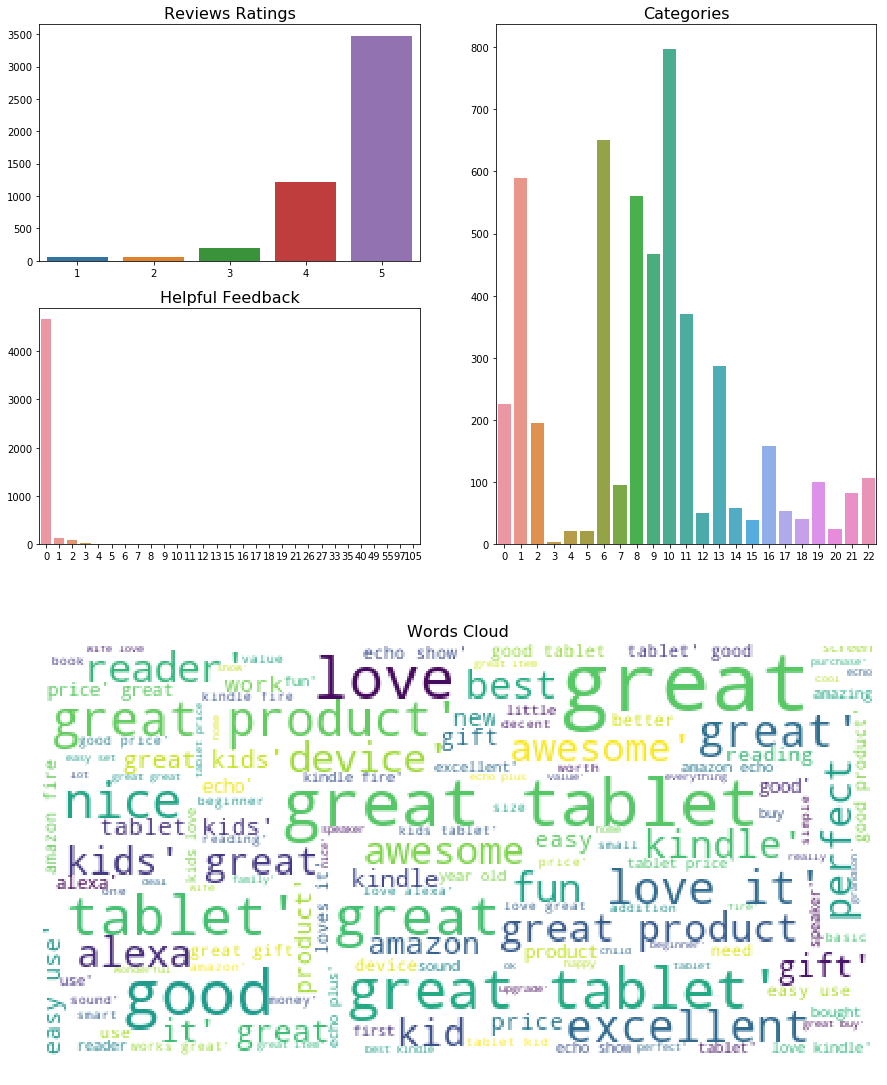

cluster of words 0:
 like
 kindle
 really
 screen
 tablet
 great
 read
 use
 just
 good

cluster of words 1:
 echo
 alexa
 love
 music
 home
 great
 amazon
 smart
 sound
 plus

cluster of words 2:
 tablet
 bought
 kindle
 loves
 love
 good
 old
 gift
 kids
 year

cluster of words 3:
 great
 tablet
 works
 price
 product
 kids
 love
 remmend
 reading
 good

cluster of words 4:
 easy
 use
 set
 great
 love
 loves
 tablet
 product
 bought
 kids



Text(0.5, 1.0, 'Genuine No. of Reviews')

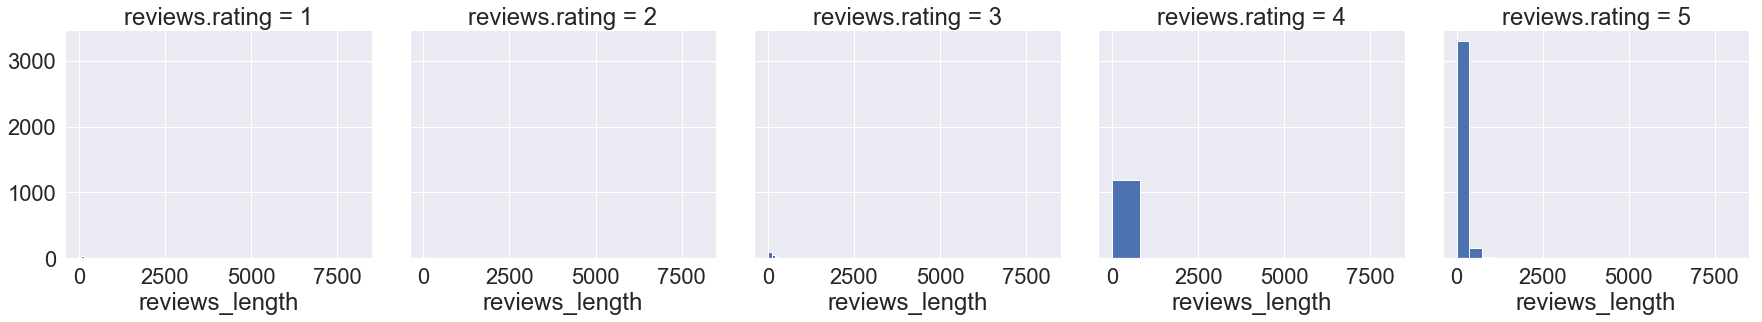

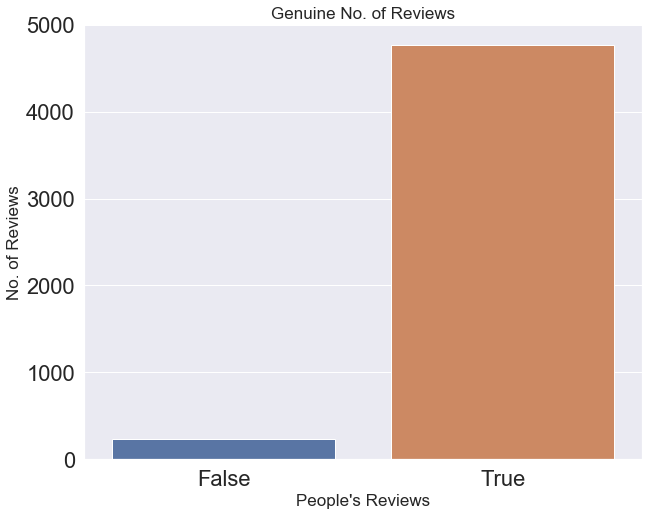

In [4]:
from subprocess import check_output
# print(check_output(["ls", "D:\CS525_IR\Group Project"]).decode("utf8"))
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns

from IPython.display import HTML
cat_hist = data.groupby('categories',as_index=False).count()
HTML(pd.DataFrame(cat_hist['categories']).to_html())
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    return re.sub("["+string.punctuation+"]", " ", x)

stops = set(stopwords.words("english"))
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)
def removeAmzString(x):
    return re.sub(r'[0-9]+ people found this helpful\. Was this review helpful to you Yes No', "", x)

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

reviews = [sent if type(sent)==str else "" for sent in data['reviews.title'].values]
reviews = [removeAmzString(sent) for sent in reviews]
#reviews = [removeStopwords(sent) for sent in reviews]
reviews = [removePunctuation(sent) for sent in reviews]

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200,
                      max_font_size=40,random_state=42).generate(str(reviews))
plt.figure(figsize=(15,20))
ax1 = plt.subplot2grid((4, 2), (0, 0))
ax2 = plt.subplot2grid((4, 2), (1, 0))
ax3 = plt.subplot2grid((4, 2), (0, 1), rowspan=2)
ax4 = plt.subplot2grid((4, 2), (2, 0), colspan=2,rowspan=2)

rat_hist = data.groupby('reviews.rating',as_index=False).count()
sns.barplot(x=rat_hist['reviews.rating'].values,y=rat_hist['id'].values,ax=ax1)

cat_hist = cat_hist.sort_values(by='id')
sns.barplot(x=cat_hist['categories'].index,y=cat_hist['id'].values,ax=ax3)

hf_hist = data.groupby('reviews.numHelpful',as_index=False).count()[0:30]
sns.barplot(x=hf_hist['reviews.numHelpful'].values.astype(int),y=hf_hist['id'].values,ax=ax2)

ax1.set_title("Reviews Ratings",fontsize=16)
ax3.set_title("Categories",fontsize=16)
ax2.set_title("Helpful Feedback",fontsize=16)
ax4.set_title("Words Cloud",fontsize=16)
ax4.imshow(wordcloud)
ax4.axis('off')
plt.show()

def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
data['reviews.text'] = [cleaning(s) for s in data['reviews.text']]
data['revies.title'] = [cleaning(s) for s in data['reviews.title']]
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['reviews.text'].str.upper())
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print() 
cnt_srs = data['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution',
    )
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="Ratings")

data['reviews_length']=data['reviews.text'].apply(len)
sns.set(font_scale=2.0)

g = sns.FacetGrid(data,col='reviews.rating',size=5)
g.map(plt.hist,'reviews_length')
#fake reviews
data['reviews.doRecommend'].fillna("Review N/A",inplace=True)
plt.figure(figsize=(10,8))
ax=sns.countplot(data['reviews.doRecommend'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)

In [5]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
data = data.dropna(subset=['reviews.text'])
data = data.dropna(subset=['reviews.rating'])
all_text=data['reviews.text']
train_text=data['reviews.text']
y=data['reviews.rating']

#Using the N-Gram Tf-idf Vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=10000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])
#Random Forest Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(preds,y_test))
# XGBoost
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
preds2=xgb_model.predict(X_test)
print(classification_report(preds2,y_test))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         8
           2       0.15      1.00      0.26         3
           3       0.20      0.87      0.33        15
           4       0.37      0.58      0.46       238
           5       0.92      0.76      0.83      1236

   micro avg       0.74      0.74      0.74      1500
   macro avg       0.43      0.84      0.51      1500
weighted avg       0.82      0.74      0.76      1500

              precision    recall  f1-score   support

           1       0.56      1.00      0.72         9
           2       0.15      1.00      0.26         3
           3       0.09      0.86      0.17         7
           4       0.16      0.55      0.25       110
           5       0.97      0.73      0.83      1371

   micro avg       0.72      0.72      0.72      1500
   macro avg       0.39      0.83      0.45      1500
weighted avg       0.90      0.72      0.78      1500



In [6]:
import pickle
filename1 = "xgboost.pkl"
filename2 = "randomForest.pkl"
filename3 = "word_vectorize.pkl"
filename4 = "char_vectorize.pkl"
picklefile = open(filename1, "wb")
pickle.dump(xgb_model, picklefile)
picklefile.close()

picklefile = open(filename2, "wb")
pickle.dump(classifier, picklefile)
picklefile.close()

picklefile = open(filename3, "wb")
pickle.dump(word_vectorizer, picklefile)
picklefile.close()

picklefile = open(filename4, "wb")
pickle.dump(char_vectorizer, picklefile)
picklefile.close()


In [4]:
# print(type(train_text[0]))
test1 = "god damn"
test1 = [test1]
test1_word = word_vectorizer.transform(test1)
test1_char = char_vectorizer.transform(test1)
test1_features = hstack([test1_char, test1_word])
test1_features = test1_features.tocsr()

test2 = [train_text[0]]
test2_word = word_vectorizer.transform(test2)
test2_char = char_vectorizer.transform(test2)
test2_features = hstack([test2_char, test2_word])
test2_features = test2_features.tocsr()
# np.mat(test1_features)
print(train_features.shape)
# print(type(X_train[0]))
# print(train_features.shape[1])
# print(type(preds2))
# test1_features = xgb.DMatrix(test1_features)
# test1_features = test1_features.as_matrix()
result = xgb_model.predict(test1_features)
# result = classifier.predict(test1_features)

print(result)

NameError: name 'word_vectorizer' is not defined

[5]


[5]
